### Articles Scrapping

This notebook aims to create our scrapping approach for the newspaper articles, that we want to analyse in the Text Mining Project. The idea is to use the *newspaper* library to download the articles and store it in a *pickle* for further usage. The issue is, that some newspaper have either paywalls or they stop responding/block the request after shooting a certain amount of request. The idea to overcome this issue is to delay the execution of the code. The *time* library provides a tool, that is able to achieve this task.

*Let's see how it goes...*

In [1]:
import newspaper
import pickle
import time

#### First approach: understanding the pickle

                                                
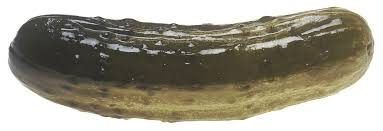

                                                #### the pickle ####

In general pickles are used to basically *pickle* your python objects for later usage. The advantage over dumping your objects in a .txt or .csv file is, that it is not necessary to upload these objects again and strip the lines for instance. So, it is possible for instance to dump a python list as a python list into a pickle without having to transform this into a different file format. In order to avoid issues with commata or semicolons we think this pickle approach could come in handy when storing our text data.

In [2]:
### Pickle PoC

word_dict = {"the": 10, 
             "a": 15, 
             "word": 60}

# this line is supposed to dump the dict: word_dict into a pickle called "word_dict.p"
pickle.dump( word_dict, open( "word_dict.p", "wb" ) ) 

# the pickle got created in the WB's directory

In [3]:
# in order to load the pickle
word_dict_load = pickle.load( open( "word_dict.p", "rb" ) )

In [4]:
# comparison:
print(word_dict)
print("*" *45)
print(word_dict_load)

{'the': 10, 'a': 15, 'word': 60}
*********************************************
{'the': 10, 'a': 15, 'word': 60}


#### Result:
To pickle your python object seems to be easy and not that complex. However, a comprehensive file format structure and a proper naming is essential to not get lost.

### Next Thing: Understanding the time

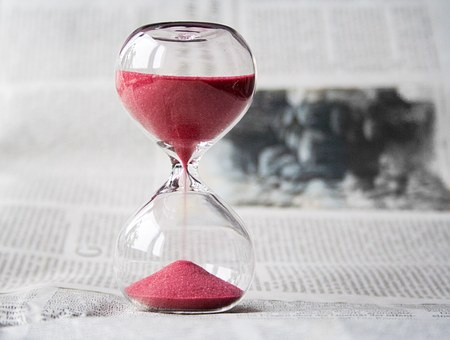

The time library supports the idea of delaying the execution of code. With this tool we could shoot multiple requests with a time delay. This hopefully works. I suppose a fine tuning of the proper delay time is essential and it probably doesn't require the same delay for every newspaper.

In [5]:
print(10)
time.sleep(15) # the argument passed measures in seconds
print(15)
time.sleep(30)
print(30)

10
15
30


### Last but not least: the *Newspaper* library

supposingly this is the most important a probably the most tricky part to do. What needs to be done is to just download all available articles and pcikle them. Easy as that. ;-)




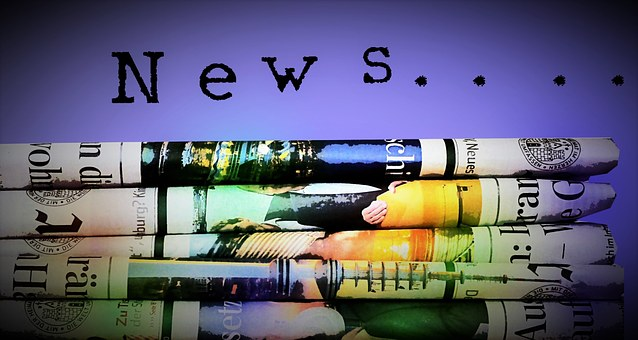

*Let's see, I'm curious...*

In [6]:
ny_politics = newspaper.build("https://www.nytimes.com/section/politics")

In [7]:
huff_politics = newspaper.build("https://www.huffpost.com/news/politics")

In [8]:
# needs to be extended
newspaper_list = [
                  #USA
                  "https://www.nytimes.com/section/politics",
                  "https://www.ft.com/",
                  "https://www.huffpost.com/news/politics",
                  "https://www.breitbart.com/politics/",
                  "https://www.washingtonpost.com/",
                  "https://www.wsj.com/europe",
                  #UK
                  "https://www.dailymail.co.uk/news/index.html",
                  "https://www.theguardian.com/international",
                  "https://www.thetimes.co.uk"
                 ]

In [12]:
# idea: use the following structure:
# newspaper_name_index = {text= "text",
#                        title = "title",
#                        author = "authors" ,
#                        date = "date",
#                        newspaper = "newspaper_name"
#                        url = "url" }
from random import randint
from time import sleep
import os

errors_file = open("errors.txt", "a")

for paper_url in newspaper_list:
    article_count = 0
    try:
        paper = newspaper.build(paper_url)
        paper_name = paper.brand
        for article in paper.articles[:]:
            if article.is_media_news: # check if the article contains media (picture_gallery or video)
                continue
            
            #Parse url to get file name and check if it has been already downloaded
            url_list = article.url.split("/")
            file_name = paper_name+ "_" + url_list[-1].replace(".html", "")
            if (any(fname == file_name) for fname in os.listdir('.')):
                print(file_name +" has already been downloaded")
                continue
            
            #Download and parse file
            article.download()
            article.parse()
            #Prepare files to be saved in pickle
            temp_dict = {}  
            temp_dict["newspaper"] = paper_name
            temp_dict["title"] = article.title
            temp_dict["author"] = article.authors
            temp_dict["url"] = article.url
            temp_dict["text"] = article.text
            
            #Save files in picke files
            pickle.dump( temp_dict, open( "articles/"+file_name, "wb" ) ) 
            article_count += 1
            sleep(randint(1,10))

    except Exception as e:
        print("error occured")
        errors_file.write(str(e))
    print("For newspaper "+paper_name+" "+str(article_count)+" articles were downloaded")

For newspaper nytimes 0 articles were downloaded
For newspaper ft 0 articles were downloaded
For newspaper huffpost 0 articles were downloaded
For newspaper breitbart 0 articles were downloaded
For newspaper washingtonpost 0 articles were downloaded
For newspaper wsj 0 articles were downloaded
For newspaper dailymail 0 articles were downloaded
For newspaper theguardian 0 articles were downloaded
For newspaper thetimes 0 articles were downloaded


In [ ]:
# To-Do's:
# -check for already downloaded to not "waste" requests(✓)
# -implement a time.sleep function to redo it overnight (1 to 10 seconds)(✓)
# -select more newspapers (✓)
# -add exception mechanism so the process doesn't fail (✓)